# Question 1

In [1]:
# libraries.

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import math
from random import uniform
from random import seed

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# preparing the data.
# here, the column 'letter' is our target.

df1 = pd.read_csv('letter_recognition.csv')
df1.columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df1 = df1.reindex(columns = [col for col in df1.columns if col != 'letter'] + ['letter'])
df1

x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0          2      8      3     5      1      8     13      0      6      6   
1          5     12      3     7      2     10      5      5      4     13   
2          4     11      6     8      6     10      6      2      6     10   
3          7     11      6     6      3      5      9      4      6      4   
4          2      1      3     1      1      8      6      6      6      6   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      2      2      3     3      2      7      7      7      6      6   
19996      7     10      8     8      4      4      8      6      9     12   
19997      6      9      6     7      5      6     11      3      7     11   
19998      2      3      4     2      1      8      7      2      6     10   
19999      4      9      6     6      2      9      5      3      1      8   

       x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx letter  
0         10      8      0      8      0      8      T  
1          3      9      2      8      4     10      I  
2          3      7      3      7      3      9      D  
3          4     10      6     10      2      8      N  
4          5      9      1      7      5     10      G  
...      ...    ...    ...    ...    ...    ...    ...  
19995      6      4      2      8      3      7      D  
19996      9     13      2      9      3      7      C  
19997      9      5      2     12      2      4      T  
19998      6      8      1      9      5      8      S  
19999      1      8      2      7      2      8      A  

[20000 rows x 17 columns]

In [3]:
# we use label encoding to convert our target classes to numerical value.
# we then use one-hot encoding to vectorize the target classes.

le = preprocessing.LabelEncoder()
df1['letter']= le.fit_transform(df1['letter'])

# vectorizing the target classes using one-hot encoding.
# in the present context we have 26 classes.

X = df1.iloc[:, -1:].values
ohe = preprocessing.OneHotEncoder()
X = ohe.fit_transform(X).toarray()

del df1['letter']
df2 = pd.DataFrame(X, columns = ['Class_A','Class_B','Class_C','Class_D','Class_E','Class_F','Class_G','Class_H','Class_I','Class_J','Class_K','Class_L','Class_M','Class_N','Class_O','Class_P','Class_Q','Class_R','Class_S','Class_T','Class_U','Class_V','Class_W','Class_X','Class_Y','Class_Z'])

frames = [df1, df2]
df = pd.concat(frames, axis=1, join='inner')
df

x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0          2      8      3     5      1      8     13      0      6      6   
1          5     12      3     7      2     10      5      5      4     13   
2          4     11      6     8      6     10      6      2      6     10   
3          7     11      6     6      3      5      9      4      6      4   
4          2      1      3     1      1      8      6      6      6      6   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      2      2      3     3      2      7      7      7      6      6   
19996      7     10      8     8      4      4      8      6      9     12   
19997      6      9      6     7      5      6     11      3      7     11   
19998      2      3      4     2      1      8      7      2      6     10   
19999      4      9      6     6      2      9      5      3      1      8   

       ...  Class_Q  Class_R  Class_S  Class_T  Class_U  Class_V  Class_W  \
0      ...      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
1      ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...    ...      ...      ...      ...      ...      ...      ...      ...   
19995  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
19996  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
19997  ...      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
19998  ...      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
19999  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       Class_X  Class_Y  Class_Z  
0          0.0      0.0      0.0  
1          0.0      0.0      0.0  
2          0.0      0.0      0.0  
3          0.0      0.0      0.0  
4          0.0      0.0      0.0  
...        ...      ...      ...  
19995      0.0      0.0      0.0  
19996      0.0      0.0      0.0  
19997      0.0      0.0      0.0  
19998      0.0      0.0      0.0  
19999      0.0      0.0      0.0  

[20000 rows x 42 columns]

In [4]:
# splitting the dataset to train and test.
# train-test ratio is 80-20.

X = df.iloc[:, 0:16]
y = df.iloc[:, 16:42]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [5]:
# converting the data from panda-dataframes to numpy-arrays.

X1 = np.array(X_train).T
X2 = np.array(X_test).T
y1 = np.array(y_train).T
y2 = np.array(y_test).T

In [6]:
# weight initialization.
# as instructed we use the 'Uniform Xavier Initialization' method.

def initialize(n_inputs, n_hidden, n_outputs):
    
    lim1 = math.sqrt(6/(n_inputs + n_hidden))
    lim2 = math.sqrt(6/(n_hidden + n_outputs))
    W1 = np.array([[uniform(-lim1, lim1) for i in range(n_inputs)] for i in range(n_hidden)])
    b1 = np.array([uniform(-lim1, lim1) for i in range(n_hidden)]).reshape(n_hidden, 1)
    W2 = np.array([[uniform(-lim1, lim1) for i in range(n_hidden)] for i in range(n_outputs)])
    b2 = np.array([uniform(-lim1, lim1) for i in range(n_outputs)]).reshape(n_outputs, 1)
    
    return W1, b1, W2, b2

## ReLU

In [7]:
# forward propagation and back propagation.
# appropriate functions are defined to perform relevant matrix and vector operations involved in
# forward and back propagation.

# the relu function.
def ReLU(Z):
    return np.maximum(Z, 0)

# the softmax function. 
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# the derivative of relu.
def ReLU_derivative(Z):
    return Z > 0

# forward propagation code chunk.
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
# backward propagation code chunk.     
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = 16
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [8]:
# weight updates.
# as instructed we use the Adam-optimizer.

# adam optimizer algoritm for W1.
momentum1 = 0
momentum2 = 0
def adam1(grad, learn, decay1, decay2):
    global momentum1
    global momentum2
    momentum1 = decay1 * momentum1 + (1- decay1) * grad
    momentum2 = decay2 * momentum2 + (1- decay2) * grad * grad
    eta = learn * momentum1 / (np.sqrt(momentum2) + 1e-7)
    return eta

# adam optimizer algoritm for b1.
momentum3 = 0
momentum4 = 0
def adam2(grad, learn, decay1, decay2):
    global momentum3
    global momentum4
    momentum3 = decay1 * momentum3 + (1- decay1) * grad
    momentum4 = decay2 * momentum4 + (1- decay2) * grad * grad
    eta = learn * momentum3 / (np.sqrt(momentum4) + 1e-7)
    return eta

# adam optimizer algoritm for W2.
momentum5 = 0
momentum6 = 0
def adam3(grad, learn, decay1, decay2):
    global momentum5
    global momentum6
    momentum5 = decay1 * momentum5 + (1- decay1) * grad
    momentum6 = decay2 * momentum6 + (1- decay2) * grad * grad
    eta = learn * momentum5 / (np.sqrt(momentum6) + 1e-7)
    return eta

# adam optimizer algoritm for b2.
momentum7 = 0
momentum8 = 0
def adam4(grad, learn, decay1, decay2):
    global momentum7
    global momentum8
    momentum7 = decay1 * momentum7 + (1- decay1) * grad
    momentum8 = decay2 * momentum8 + (1- decay2) * grad * grad
    eta = learn * momentum7 / (np.sqrt(momentum8) + 1e-7)
    return eta

# updating the weights.
def update(W1, b1, W2, b2, dW1, db1, dW2, db2, learn, decay1, decay2):
    W1 = W1 - adam1(dW1, learn, decay1, decay2)
    b1 = b1 - adam2(db1, learn, decay1, decay2)    
    W2 = W2 - adam3(dW2, learn, decay1, decay2) 
    b2 = b2 - adam4(db2, learn, decay1, decay2)    
    return W1, b1, W2, b2

In [9]:
# training, testing and plotting.
# appropriate functions are defined to train the network and then to make predictions on the test set.
# a function to plot loss-accuarcy curve is also defined.

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):    
    return np.sum(predictions == np.argmax(Y, 0)) / predictions.size

def results(X, Y, learn, decay1, decay2, epochs):
    acc = []
    lss = []
    W1, b1, W2, b2 = initialize(16, 26, 26)
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, learn, decay1, decay2)
        predictions = get_predictions(A2)
        ac = get_accuracy(predictions, Y)
        loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
        acc.append(ac)
        lss.append(loss)
        if i % 10 == 0:
            print("Epochs: ", i)
            print(predictions, np.argmax(Y, 0))
            print('loss: ', loss)
            print('accuracy:', get_accuracy(predictions, Y))
            print('----------------------')
    return W1, b1, W2, b2, acc, lss

def make_predictions(X, Y, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
    print('--------------------------------------------')
    print(predictions, np.argmax(Y, 0))
    print('loss: ', loss)
    print('accuracy:', get_accuracy(predictions, Y))
    print('--------------------------------------------')
    return predictions

def graph(a, b, epochs):
    
    plt.plot(epochs, a, label = 'accuracy')
    plt.plot(epochs, b, label = 'loss')
    plt.legend()
    plt.show()
    
def plot_graph(train, test, num_epochs, ylabel):
    plt.plot(num_epochs, train, label = 'Training')
    plt.plot(num_epochs, test, label = 'Validation')
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

Training :
--------------------------------------------

Epochs:  0
[ 2  2  2 ...  2  2 11] [ 8 12 25 ...  2 15  1]
loss:  0.4992520106440277
accuracy: 0.0611875
----------------------
Epochs:  10
[11 18 11 ... 11 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.15283936571026618
accuracy: 0.1214375
----------------------
Epochs:  20
[ 9 20  9 ...  9 15 25] [ 8 12 25 ...  2 15  1]
loss:  0.13457263107184997
accuracy: 0.18575
----------------------
Epochs:  30
[ 8 20  9 ...  2 15  0] [ 8 12 25 ...  2 15  1]
loss:  0.11805583874657187
accuracy: 0.3109375
----------------------
Epochs:  40
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10529206993107197
accuracy: 0.4053125
----------------------
Epochs:  50
[25 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10030612961549017
accuracy: 0.425625
----------------------
Epochs:  60
[ 8 12 25 ...  0 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09490581012814396
accuracy: 0.48075
----------------------
Epochs:  70
[ 8 12 25 ...  6 15 18] [ 8 

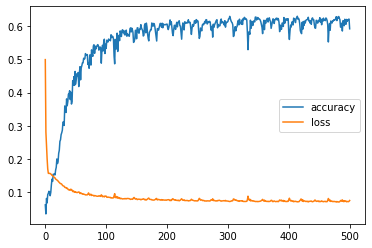

In [10]:
# training using certain combinations and then testing.
# first of all, all momentums are initialised.

momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.88, 501)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(501))

Training :
--------------------------------------------

Epochs:  0
[12 12 12 ...  6 12 13] [ 8 12 25 ...  2 15  1]
loss:  0.3922027186624642
accuracy: 0.021375
----------------------
Epochs:  10
[19 14  8 ... 24 24 19] [ 8 12 25 ...  2 15  1]
loss:  0.15091490249811504
accuracy: 0.0989375
----------------------
Epochs:  20
[ 8 14 25 ... 24 18 19] [ 8 12 25 ...  2 15  1]
loss:  0.13441363982256424
accuracy: 0.231875
----------------------
Epochs:  30
[ 8 14 25 ... 24 15 15] [ 8 12 25 ...  2 15  1]
loss:  0.12055949534505563
accuracy: 0.3083125
----------------------
Epochs:  40
[ 8 13 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10786393533434953
accuracy: 0.3716875
----------------------
Epochs:  50
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10539425727827326
accuracy: 0.3988125
----------------------
Epochs:  60
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09943244941867097
accuracy: 0.4498125
----------------------
Epochs:  70
[ 8 12 25 ...  2 15  1] [

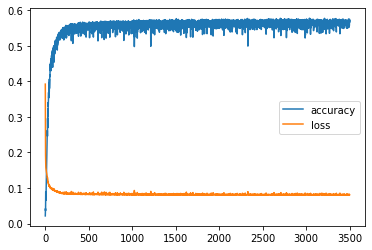

In [11]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.9, 3501)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(3501))

Training :
--------------------------------------------

Epochs:  0
[25 25 25 ... 25 25 25] [ 8 12 25 ...  2 15  1]
loss:  0.5318888256628851
accuracy: 0.0369375
----------------------
Epochs:  10
[13 13 13 ... 13  8  0] [ 8 12 25 ...  2 15  1]
loss:  0.1617257199154559
accuracy: 0.0755625
----------------------
Epochs:  20
[ 5 13  0 ...  0  5  0] [ 8 12 25 ...  2 15  1]
loss:  0.15083221502884053
accuracy: 0.0800625
----------------------
Epochs:  30
[15 13  0 ...  0  8  0] [ 8 12 25 ...  2 15  1]
loss:  0.14473511694640154
accuracy: 0.1315
----------------------
Epochs:  40
[ 8 13  9 ...  0  8  0] [ 8 12 25 ...  2 15  1]
loss:  0.13892967249098112
accuracy: 0.13825
----------------------
Epochs:  50
[ 8 13  0 ...  0  8  0] [ 8 12 25 ...  2 15  1]
loss:  0.13549078218460076
accuracy: 0.1653125
----------------------
Epochs:  60
[ 8 13 25 ...  0 15 25] [ 8 12 25 ...  2 15  1]
loss:  0.13335106262251267
accuracy: 0.178125
----------------------
Epochs:  70
[ 9 13 25 ...  0 15 25] [ 8 12

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  980
[ 8 12 25 ... 11  3  1] [ 8 12 25 ...  2 15  1]
loss:  0.10628842524183856
accuracy: 0.3915625
----------------------
Epochs:  990
[ 8 12 25 ...  0  3  1] [ 8 12 25 ...  2 15  1]
loss:  0.10429483716347872
accuracy: 0.404875
----------------------
Epochs:  1000
[ 8 12 25 ...  0 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10550492276102878
accuracy: 0.394
----------------------
Epochs:  1010
[ 8 12 25 ...  0  3  1] [ 8 12 25 ...  2 15  1]
loss:  0.10430591858833033
accuracy: 0.40425
----------------------
Epochs:  1020
[ 8 12 25 ...  0  3  1] [ 8 12 25 ...  2 15  1]
loss:  0.10398245376912656
accuracy: 0.4025
----------------------
Epochs:  1030
[ 8 12 25 ...  0  3  1] [ 8 12 25 ...  2 15  1]
loss:  0.10497127292040394
accuracy: 0.4041875
----------------------
Epochs:  1040
[ 8 12 25 ... 11  3  1] [ 8 12 25 ...  2 15  1]
loss:  0.10461497072673907
accuracy: 0.4088125
----------------------
Epochs:  1050
[ 4 12 25 ...  0 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10757590116356704

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


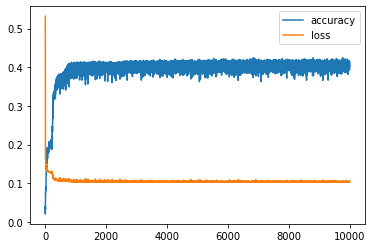

In [12]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[ 5  6  5 ... 15  6  6] [ 8 12 25 ...  2 15  1]
loss:  0.4189770282230081
accuracy: 0.02875
----------------------
Epochs:  10
[8 1 8 ... 1 1 1] [ 8 12 25 ...  2 15  1]
loss:  0.16016277389643685
accuracy: 0.066625
----------------------
Epochs:  20
[9 1 9 ... 1 1 1] [ 8 12 25 ...  2 15  1]
loss:  0.15505213747663518
accuracy: 0.0703125
----------------------
Epochs:  30
[8 1 8 ... 1 1 1] [ 8 12 25 ...  2 15  1]
loss:  0.15318248729393133
accuracy: 0.077
----------------------
Epochs:  40
[8 1 8 ... 1 1 1] [ 8 12 25 ...  2 15  1]
loss:  0.1522581596643597
accuracy: 0.07475
----------------------
Epochs:  50
[8 1 8 ... 1 1 1] [ 8 12 25 ...  2 15  1]
loss:  0.15184531061808165
accuracy: 0.0734375
----------------------
Epochs:  60
[ 8  1 19 ...  1  1  1] [ 8 12 25 ...  2 15  1]
loss:  0.15193194082691505
accuracy: 0.077375
----------------------
Epochs:  70
[ 8  1 19 ...  1  4  1] [ 8 12 25 ...  2 15  1]
loss:  0.1514387

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  880
[ 8 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.1269993015120219
accuracy: 0.1905
----------------------
Epochs:  890
[18 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.12532801140057298
accuracy: 0.1904375
----------------------
Epochs:  900
[18 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.1254290514817985
accuracy: 0.18475
----------------------
Epochs:  910
[ 9 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.1261131090675945
accuracy: 0.192875
----------------------
Epochs:  920
[ 9 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.1261754750046818
accuracy: 0.1900625
----------------------
Epochs:  930
[ 9 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.12597365183318968
accuracy: 0.1920625
----------------------
Epochs:  940
[18 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.12608729849342756
accuracy: 0.1928125
----------------------
Epochs:  950
[18 22 25 ...  4 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.12536629719138123
accur

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


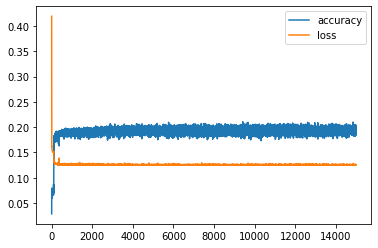

In [13]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[18 18 18 ... 18 18  1] [ 8 12 25 ...  2 15  1]
loss:  0.32379638072065764
accuracy: 0.0224375
----------------------
Epochs:  10
[ 2 20  2 ... 11  5  2] [ 8 12 25 ...  2 15  1]
loss:  0.14822973430036354
accuracy: 0.123625
----------------------
Epochs:  20
[11 12 11 ... 11 22 11] [ 8 12 25 ...  2 15  1]
loss:  0.13669251256963988
accuracy: 0.1653125
----------------------
Epochs:  30
[ 8 12  4 ... 16 22 11] [ 8 12 25 ...  2 15  1]
loss:  0.12371093337244951
accuracy: 0.27375
----------------------
Epochs:  40
[ 8 12  4 ...  6 20 11] [ 8 12 25 ...  2 15  1]
loss:  0.11614156869614722
accuracy: 0.3051875
----------------------
Epochs:  50
[ 8 12 25 ...  6 20 25] [ 8 12 25 ...  2 15  1]
loss:  0.11151615297267216
accuracy: 0.333
----------------------
Epochs:  60
[ 8 12 25 ...  6 20 25] [ 8 12 25 ...  2 15  1]
loss:  0.11203490749806717
accuracy: 0.329875
----------------------
Epochs:  70
[ 8 12 25 ...  6 20 25] [ 8 12

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  3120
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.057861708662248115
accuracy: 0.7041875
----------------------
Epochs:  3130
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.057796064802990564
accuracy: 0.7053125
----------------------
Epochs:  3140
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.057766477946513094
accuracy: 0.7056875
----------------------
Epochs:  3150
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05797640327653247
accuracy: 0.7033125
----------------------
Epochs:  3160
[23 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05808144110579691
accuracy: 0.706375
----------------------
Epochs:  3170
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05937247005859758
accuracy: 0.6935625
----------------------
Epochs:  3180
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05720225877610913
accuracy: 0.706
----------------------
Epochs:  3190
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0568105

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


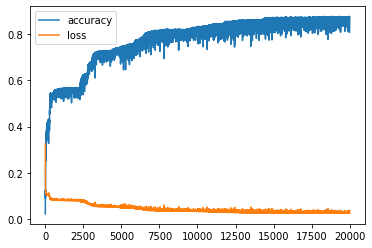

In [14]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

Training :
--------------------------------------------

Epochs:  0
[23  4 19 ... 25 19 25] [ 8 12 25 ...  2 15  1]
loss:  0.399466266649233
accuracy: 0.023125
----------------------
Epochs:  10
[10 10 10 ... 10 10 10] [ 8 12 25 ...  2 15  1]
loss:  0.16406460522297409
accuracy: 0.0390625
----------------------
Epochs:  20
[14 10 14 ... 10 10 10] [ 8 12 25 ...  2 15  1]
loss:  0.16325421923126696
accuracy: 0.0468125
----------------------
Epochs:  30
[ 9 10  8 ... 10 10 10] [ 8 12 25 ...  2 15  1]
loss:  0.1584995389869169
accuracy: 0.07175
----------------------
Epochs:  40
[ 9 10  8 ... 10 10 10] [ 8 12 25 ...  2 15  1]
loss:  0.15713061223765012
accuracy: 0.07425
----------------------
Epochs:  50
[ 9 10  8 ... 10 10 10] [ 8 12 25 ...  2 15  1]
loss:  0.15603071857772274
accuracy: 0.07125
----------------------
Epochs:  60
[ 9 10  8 ... 10 10 10] [ 8 12 25 ...  2 15  1]
loss:  0.15516968941458525
accuracy: 0.0713125
----------------------
Epochs:  70
[ 9 10  9 ... 10 10 10] [ 8 12 2

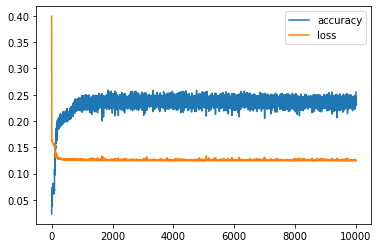

In [15]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.065, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[19  6  6 ...  6  6  6] [ 8 12 25 ...  2 15  1]
loss:  0.38538670490483223
accuracy: 0.0315625
----------------------
Epochs:  10
[17 17 17 ... 17 17 17] [ 8 12 25 ...  2 15  1]
loss:  0.16276197518393482
accuracy: 0.0556875
----------------------
Epochs:  20
[11 17 17 ... 17 17 17] [ 8 12 25 ...  2 15  1]
loss:  0.158284635460685
accuracy: 0.0605
----------------------
Epochs:  30
[ 9 17 17 ... 17 17 17] [ 8 12 25 ...  2 15  1]
loss:  0.15648058205952203
accuracy: 0.0723125
----------------------
Epochs:  40
[ 9 17 17 ... 17 17 17] [ 8 12 25 ...  2 15  1]
loss:  0.1559314887870544
accuracy: 0.0613125
----------------------
Epochs:  50
[ 9 17 17 ... 17 17 17] [ 8 12 25 ...  2 15  1]
loss:  0.1557748890840965
accuracy: 0.0636875
----------------------
Epochs:  60
[ 9 17  9 ... 17 17 17] [ 8 12 25 ...  2 15  1]
loss:  0.15510380871135018
accuracy: 0.061125
----------------------
Epochs:  70
[11 17  9 ... 17 17 17] [ 8 12

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  570
[25 17 25 ... 11 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.15176374633636447
accuracy: 0.072375
----------------------
Epochs:  580
[25 17 25 ...  9 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.15179853047544248
accuracy: 0.074375
----------------------
Epochs:  590
[25 17 11 ... 11 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.15178836483025518
accuracy: 0.0684375
----------------------
Epochs:  600
[25 17 11 ... 11 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.15222162485657859
accuracy: 0.0656875
----------------------
Epochs:  610
[25 17 11 ...  9 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.15182432239908777
accuracy: 0.0724375
----------------------
Epochs:  620
[25 17 11 ... 11 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.1517625297330429
accuracy: 0.071375
----------------------
Epochs:  630
[25 17 11 ... 11 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.1517953323960789
accuracy: 0.0691875
----------------------
Epochs:  640
[25 17 11 ... 11 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.15177940045014868


/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


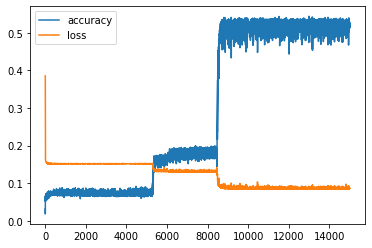

In [16]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.065, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[18 18 18 ...  8 18  9] [ 8 12 25 ...  2 15  1]
loss:  0.3457167309872896
accuracy: 0.0156875
----------------------
Epochs:  10
[25 25 25 ... 25 25 25] [ 8 12 25 ...  2 15  1]
loss:  0.16375976140075613
accuracy: 0.0369375
----------------------
Epochs:  20
[25 25 25 ... 25 25 25] [ 8 12 25 ...  2 15  1]
loss:  0.16375985191948678
accuracy: 0.0369375
----------------------
Epochs:  30
[25 25 25 ... 25 25 25] [ 8 12 25 ...  2 15  1]
loss:  0.16375985191948678
accuracy: 0.0369375
----------------------
Epochs:  40
[25 25 25 ... 25 25 25] [ 8 12 25 ...  2 15  1]
loss:  0.16375985191948678
accuracy: 0.0369375
----------------------
Epochs:  50
[25 25 25 ... 25 25 25] [ 8 12 25 ...  2 15  1]
loss:  0.16375985191948678
accuracy: 0.0369375
----------------------
Epochs:  60
[25 25 25 ... 25 25 25] [ 8 12 25 ...  2 15  1]
loss:  0.1637598519194868
accuracy: 0.0369375
----------------------
Epochs:  70
[25 25 25 ... 25 25 25] 

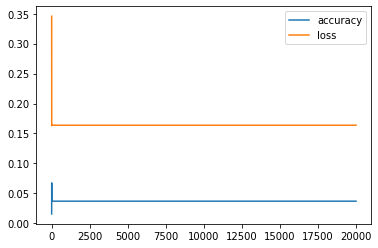

In [17]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.065, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

Training :
--------------------------------------------

Epochs:  0
[8 8 8 ... 8 8 8] [ 8 12 25 ...  2 15  1]
loss:  0.4377690672481272
accuracy: 0.0496875
----------------------
Epochs:  10
[22 22  6 ...  4 13  4] [ 8 12 25 ...  2 15  1]
loss:  0.1571303922747418
accuracy: 0.0909375
----------------------
Epochs:  20
[24  4  9 ...  4 15 11] [ 8 12 25 ...  2 15  1]
loss:  0.14475954118708156
accuracy: 0.155375
----------------------
Epochs:  30
[ 8 15  9 ...  4 15 17] [ 8 12 25 ...  2 15  1]
loss:  0.12872684611419805
accuracy: 0.243375
----------------------
Epochs:  40
[ 8 22 25 ... 10 15 17] [ 8 12 25 ...  2 15  1]
loss:  0.10631574818401442
accuracy: 0.4196875
----------------------
Epochs:  50
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0895202947802206
accuracy: 0.53125
----------------------
Epochs:  60
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08233409917739527
accuracy: 0.58075
----------------------
Epochs:  70
[ 8 12 25 ... 10 15  1] [ 8 12 25 ...

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  1420
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.04270350307484548
accuracy: 0.782875
----------------------
Epochs:  1430
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.041977856472618015
accuracy: 0.7815625
----------------------
Epochs:  1440
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.04256204996065818
accuracy: 0.7785625
----------------------
Epochs:  1450
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.041707422852396314
accuracy: 0.78775
----------------------
Epochs:  1460
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.039790646858995596
accuracy: 0.7985
----------------------
Epochs:  1470
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.041291079840275496
accuracy: 0.78625
----------------------
Epochs:  1480
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.040202918707511026
accuracy: 0.7971875
----------------------
Epochs:  1490
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.04025269

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


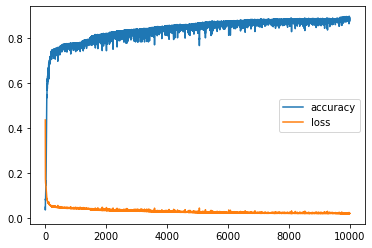

In [18]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.035, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[18 18 18 ...  1 18 18] [ 8 12 25 ...  2 15  1]
loss:  0.32164906792840064
accuracy: 0.0579375
----------------------
Epochs:  10
[11 22 11 ... 22 22 23] [ 8 12 25 ...  2 15  1]
loss:  0.15404293749899603
accuracy: 0.1178125
----------------------
Epochs:  20
[ 8 12 11 ... 23 13  6] [ 8 12 25 ...  2 15  1]
loss:  0.13285865709320496
accuracy: 0.21775
----------------------
Epochs:  30
[ 9 12 18 ...  6 15  6] [ 8 12 25 ...  2 15  1]
loss:  0.10977012669306327
accuracy: 0.389625
----------------------
Epochs:  40
[ 8 12 25 ...  1 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09884975231616552
accuracy: 0.449125
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09233758206455503
accuracy: 0.48725
----------------------
Epochs:  60
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08896576167355584
accuracy: 0.526375
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 1

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  2280
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06926473092844675
accuracy: 0.6451875
----------------------
Epochs:  2290
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06887057952117613
accuracy: 0.64325
----------------------
Epochs:  2300
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06967852349504428
accuracy: 0.6364375
----------------------
Epochs:  2310
[ 8 12 25 ... 11 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07009004691677403
accuracy: 0.6366875
----------------------
Epochs:  2320
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06980259462993739
accuracy: 0.641125
----------------------
Epochs:  2330
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0686067128774072
accuracy: 0.651125
----------------------
Epochs:  2340
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0684115671756823
accuracy: 0.6535
----------------------
Epochs:  2350
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07036270474535

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


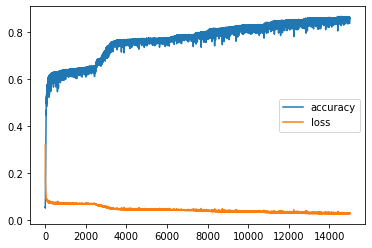

In [19]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.035, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[14 14 14 ... 14 14 14] [ 8 12 25 ...  2 15  1]
loss:  0.6726908826028724
accuracy: 0.0381875
----------------------
Epochs:  10
[19 22  5 ...  1 15 22] [ 8 12 25 ...  2 15  1]
loss:  0.1535004859395219
accuracy: 0.1408125
----------------------
Epochs:  20
[ 8 22  9 ...  9 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.1289917583639088
accuracy: 0.26625
----------------------
Epochs:  30
[ 8 22  4 ...  1 15 25] [ 8 12 25 ...  2 15  1]
loss:  0.10535987278950726
accuracy: 0.3865
----------------------
Epochs:  40
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08447835888069685
accuracy: 0.5444375
----------------------
Epochs:  50
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07555819898523615
accuracy: 0.601625
----------------------
Epochs:  60
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06602032886915662
accuracy: 0.67075
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 12 25

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  1240
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.03347435373113884
accuracy: 0.8291875
----------------------
Epochs:  1250
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.032568622682609044
accuracy: 0.8344375
----------------------
Epochs:  1260
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.034463701965279134
accuracy: 0.82775
----------------------
Epochs:  1270
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.032434309626500644
accuracy: 0.8354375
----------------------
Epochs:  1280
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.03216232518254733
accuracy: 0.8379375
----------------------
Epochs:  1290
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.031059337646378027
accuracy: 0.845
----------------------
Epochs:  1300
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.03232534179284356
accuracy: 0.8369375
----------------------
Epochs:  1310
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0312268

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


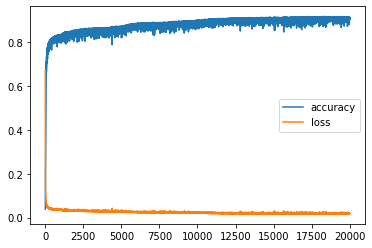

In [20]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.035, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

Training :
--------------------------------------------

Epochs:  0
[21  6 21 ...  0 21  6] [ 8 12 25 ...  2 15  1]
loss:  0.35444310983576566
accuracy: 0.051875
----------------------
Epochs:  10
[25 12  8 ...  0 19 12] [ 8 12 25 ...  2 15  1]
loss:  0.14497523496935338
accuracy: 0.1695625
----------------------
Epochs:  20
[ 8 12  8 ...  4 21  4] [ 8 12 25 ...  2 15  1]
loss:  0.11091279896519725
accuracy: 0.38025
----------------------
Epochs:  30
[ 8 12 25 ...  4 15  4] [ 8 12 25 ...  2 15  1]
loss:  0.08294762449120484
accuracy: 0.598125
----------------------
Epochs:  40
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06997892640715846
accuracy: 0.6795625
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.063419051421468
accuracy: 0.71
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.058985405956560155
accuracy: 0.7251875
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 12 2

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  1740
[ 8 12 25 ... 23 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02759331284607669
accuracy: 0.8615625
----------------------
Epochs:  1750
[ 8 12 25 ... 23 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.024899911419334553
accuracy: 0.8771875
----------------------
Epochs:  1760
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02512427829433743
accuracy: 0.8761875
----------------------
Epochs:  1770
[ 8 12 25 ... 23 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02447176537039438
accuracy: 0.881
----------------------
Epochs:  1780
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.025121617127684587
accuracy: 0.8774375
----------------------
Epochs:  1790
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.024410871913241046
accuracy: 0.8815
----------------------
Epochs:  1800
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.025656675018123683
accuracy: 0.8733125
----------------------
Epochs:  1810
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02423379

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


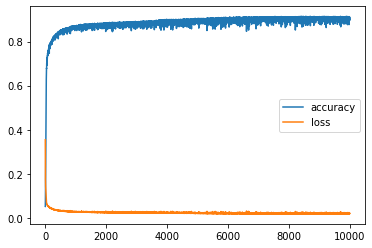

In [21]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.02, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[18  1 14 ... 18 14 18] [ 8 12 25 ...  2 15  1]
loss:  0.3217831040475077
accuracy: 0.0335
----------------------
Epochs:  10
[ 8 20  4 ... 15  7 15] [ 8 12 25 ...  2 15  1]
loss:  0.15051210456939618
accuracy: 0.137
----------------------
Epochs:  20
[ 8 20 25 ...  6 15 15] [ 8 12 25 ...  2 15  1]
loss:  0.11977301003117537
accuracy: 0.309875
----------------------
Epochs:  30
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08996374365047259
accuracy: 0.5439375
----------------------
Epochs:  40
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07446447342643416
accuracy: 0.6473125
----------------------
Epochs:  50
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0657444090444008
accuracy: 0.6950625
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06100125080019116
accuracy: 0.7111875
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 12 2

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  5060
[ 8 12 25 ... 17 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.022667522635777752
accuracy: 0.8871875
----------------------
Epochs:  5070
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.020160420799747104
accuracy: 0.9035
----------------------
Epochs:  5080
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02047985503644598
accuracy: 0.9015
----------------------
Epochs:  5090
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.019992938067746654
accuracy: 0.903875
----------------------
Epochs:  5100
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02159164568987109
accuracy: 0.89275
----------------------
Epochs:  5110
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.01969059004947379
accuracy: 0.90575
----------------------
Epochs:  5120
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.021220022763413362
accuracy: 0.8975625
----------------------
Epochs:  5130
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.019582328897

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


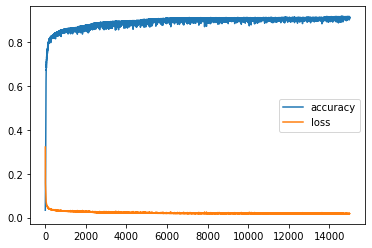

In [22]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.02, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[14 14 23 ... 14 23 14] [ 8 12 25 ...  2 15  1]
loss:  0.6523508134136338
accuracy: 0.04025
----------------------
Epochs:  10
[ 4 14 13 ... 21  7 21] [ 8 12 25 ...  2 15  1]
loss:  0.16037524917862855
accuracy: 0.0934375
----------------------
Epochs:  20
[ 4 12 10 ... 10  9 10] [ 8 12 25 ...  2 15  1]
loss:  0.1357364567856326
accuracy: 0.2085
----------------------
Epochs:  30
[ 4 12 25 ...  1 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10448172155045556
accuracy: 0.4674375
----------------------
Epochs:  40
[ 8 12 25 ... 17 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0844181033191453
accuracy: 0.581375
----------------------
Epochs:  50
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07522588853769858
accuracy: 0.621875
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06933645514490859
accuracy: 0.6630625
----------------------
Epochs:  70
[ 8 12 25 ...  4 15  1] [ 8 12 2

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  4580
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.027096648750341283
accuracy: 0.8674375
----------------------
Epochs:  4590
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.025144395516178433
accuracy: 0.8774375
----------------------
Epochs:  4600
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.026705222223711238
accuracy: 0.868625
----------------------
Epochs:  4610
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.025523360965773026
accuracy: 0.873875
----------------------
Epochs:  4620
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02615403085043249
accuracy: 0.86875
----------------------
Epochs:  4630
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.027906766583542977
accuracy: 0.856625
----------------------
Epochs:  4640
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.025306521290528662
accuracy: 0.875375
----------------------
Epochs:  4650
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02572

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


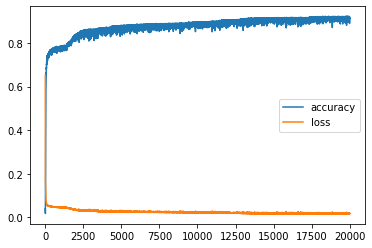

In [23]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.02, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

Training :
--------------------------------------------

Epochs:  0
[17 17 17 ... 17 17 17] [ 8 12 25 ...  2 15  1]
loss:  0.47049633635049926
accuracy: 0.038125
----------------------
Epochs:  10
[20 17 13 ... 20  7 18] [ 8 12 25 ...  2 15  1]
loss:  0.16948604163256617
accuracy: 0.069
----------------------
Epochs:  20
[25 12  4 ... 25  7  6] [ 8 12 25 ...  2 15  1]
loss:  0.1486022590566955
accuracy: 0.1485625
----------------------
Epochs:  30
[25 12  4 ... 18  7  1] [ 8 12 25 ...  2 15  1]
loss:  0.12997334017686288
accuracy: 0.2685
----------------------
Epochs:  40
[ 8 12 25 ... 18 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10982469471030906
accuracy: 0.4284375
----------------------
Epochs:  50
[ 8 12  4 ...  1 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09223417723736362
accuracy: 0.557375
----------------------
Epochs:  60
[ 8 12  4 ... 17 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08041611174320384
accuracy: 0.6265
----------------------
Epochs:  70
[ 8 12  4 ...  6 15  1] [ 8 12 25 .

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  3840
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.023805855969701778
accuracy: 0.882
----------------------
Epochs:  3850
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02440697214425765
accuracy: 0.8780625
----------------------
Epochs:  3860
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02388832691171638
accuracy: 0.881875
----------------------
Epochs:  3870
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02379815772963674
accuracy: 0.880875
----------------------
Epochs:  3880
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.023721270968995962
accuracy: 0.8819375
----------------------
Epochs:  3890
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02391465142779949
accuracy: 0.8813125
----------------------
Epochs:  3900
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.023845701428330177
accuracy: 0.881125
----------------------
Epochs:  3910
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.023766684

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


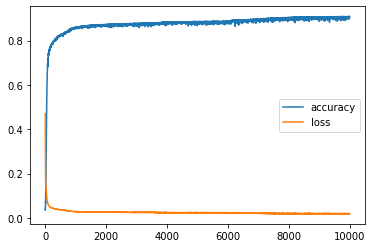

In [24]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.01, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[14 25  8 ... 14 14 14] [ 8 12 25 ...  2 15  1]
loss:  0.3581021492093906
accuracy: 0.0500625
----------------------
Epochs:  10
[20  0 11 ...  5 18 13] [ 8 12 25 ...  2 15  1]
loss:  0.16957007597371787
accuracy: 0.0864375
----------------------
Epochs:  20
[22  0 11 ... 22 18 18] [ 8 12 25 ...  2 15  1]
loss:  0.14868259982726517
accuracy: 0.158875
----------------------
Epochs:  30
[ 8 12  8 ... 10 13 18] [ 8 12 25 ...  2 15  1]
loss:  0.12828892401530329
accuracy: 0.2745625
----------------------
Epochs:  40
[ 8 12 25 ... 17 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.10558367825471095
accuracy: 0.441375
----------------------
Epochs:  50
[ 8 12 25 ... 17 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0882494411363887
accuracy: 0.572
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07731717003906059
accuracy: 0.637625
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 12 

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  3610
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.029794369978554728
accuracy: 0.8566875
----------------------
Epochs:  3620
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.029772244662547052
accuracy: 0.8560625
----------------------
Epochs:  3630
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.029939980550452144
accuracy: 0.855375
----------------------
Epochs:  3640
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02980949535273336
accuracy: 0.856125
----------------------
Epochs:  3650
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02998127670442048
accuracy: 0.85375
----------------------
Epochs:  3660
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0299681326334409
accuracy: 0.857125
----------------------
Epochs:  3670
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.029803656698613554
accuracy: 0.8571875
----------------------
Epochs:  3680
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0310823

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


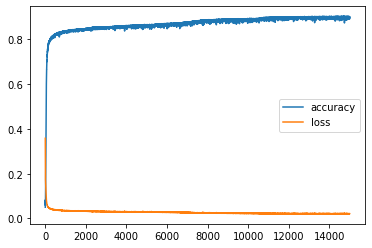

In [25]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.01, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[23 23 15 ... 21 16 21] [ 8 12 25 ...  2 15  1]
loss:  0.3187980572795191
accuracy: 0.04275
----------------------
Epochs:  10
[24  9  3 ...  1 16  9] [ 8 12 25 ...  2 15  1]
loss:  0.15609571548305662
accuracy: 0.086625
----------------------
Epochs:  20
[24  7 19 ...  1 17  9] [ 8 12 25 ...  2 15  1]
loss:  0.13853243270134183
accuracy: 0.2215625
----------------------
Epochs:  30
[25 12 25 ...  1 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.11720840470767628
accuracy: 0.366875
----------------------
Epochs:  40
[ 4 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09410309289961943
accuracy: 0.5316875
----------------------
Epochs:  50
[ 4 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07746193395706402
accuracy: 0.6471875
----------------------
Epochs:  60
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06716619537097744
accuracy: 0.693
----------------------
Epochs:  70
[ 8 12 25 ... 16 15  1] [ 8 12 

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:21: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


Epochs:  3210
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.020090019002161844
accuracy: 0.90275
----------------------
Epochs:  3220
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.020148837012121917
accuracy: 0.9029375
----------------------
Epochs:  3230
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.019924980927885656
accuracy: 0.9045625
----------------------
Epochs:  3240
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.020724253554483294
accuracy: 0.8984375
----------------------
Epochs:  3250
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.019756420548491117
accuracy: 0.9054375
----------------------
Epochs:  3260
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.020321111204878624
accuracy: 0.90225
----------------------
Epochs:  3270
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.019771122584974234
accuracy: 0.9053125
----------------------
Epochs:  3280
[ 8 12 25 ...  2 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.02

/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
/var/folders/jb/n6rt0dr930zgwv441b3pvnx40000gn/T/ipykernel_18555/3274231871.py:35: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)


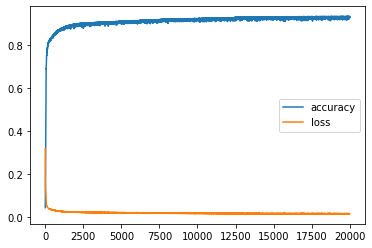

In [26]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.01, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

## Tanh

In [27]:
# forward propagation and back propagation.

# the tanh function.
def Tanh(Z):
    return np.tanh(Z)

# the softmax function. 
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# the derivative of tanh.
def Tanh_derivative(Z):
    return 1 - (Tanh(Z) * Tanh(Z))

# forward propagation code chunk.
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
# backward propagation code chunk.     
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = 16
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * Tanh_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2



In [28]:
# weight updates.
# as instructed we use the Adam-optimizer.

# adam optimizer algoritm for W1.
momentum1 = 0
momentum2 = 0
def adam1(grad, learn, decay1, decay2):
    global momentum1
    global momentum2
    momentum1 = decay1 * momentum1 + (1- decay1) * grad
    momentum2 = decay2 * momentum2 + (1- decay2) * grad * grad
    eta = learn * momentum1 / (np.sqrt(momentum2) + 1e-7)
    return eta

# adam optimizer algoritm for b1.
momentum3 = 0
momentum4 = 0
def adam2(grad, learn, decay1, decay2):
    global momentum3
    global momentum4
    momentum3 = decay1 * momentum3 + (1- decay1) * grad
    momentum4 = decay2 * momentum4 + (1- decay2) * grad * grad
    eta = learn * momentum3 / (np.sqrt(momentum4) + 1e-7)
    return eta

# adam optimizer algoritm for W2.
momentum5 = 0
momentum6 = 0
def adam3(grad, learn, decay1, decay2):
    global momentum5
    global momentum6
    momentum5 = decay1 * momentum5 + (1- decay1) * grad
    momentum6 = decay2 * momentum6 + (1- decay2) * grad * grad
    eta = learn * momentum5 / (np.sqrt(momentum6) + 1e-7)
    return eta

# adam optimizer algoritm for b2.
momentum7 = 0
momentum8 = 0
def adam4(grad, learn, decay1, decay2):
    global momentum7
    global momentum8
    momentum7 = decay1 * momentum7 + (1- decay1) * grad
    momentum8 = decay2 * momentum8 + (1- decay2) * grad * grad
    eta = learn * momentum7 / (np.sqrt(momentum8) + 1e-7)
    return eta

# updating the weights.
def update(W1, b1, W2, b2, dW1, db1, dW2, db2, learn, decay1, decay2):
    W1 = W1 - adam1(dW1, learn, decay1, decay2)
    b1 = b1 - adam2(db1, learn, decay1, decay2)    
    W2 = W2 - adam3(dW2, learn, decay1, decay2) 
    b2 = b2 - adam4(db2, learn, decay1, decay2)    
    return W1, b1, W2, b2

In [29]:
# training, testing and plotting.
# appropriate functions are defined to train the network and then to make predictions on the test set.
# a function to plot loss-accuarcy curve is also defined.

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):    
    return np.sum(predictions == np.argmax(Y, 0)) / predictions.size

def results(X, Y, learn, decay1, decay2, epochs):
    acc = []
    lss = []
    W1, b1, W2, b2 = initialize(16, 26, 26)
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, learn, decay1, decay2)
        predictions = get_predictions(A2)
        ac = get_accuracy(predictions, Y)
        loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
        acc.append(ac)
        lss.append(loss)
        if i % 10 == 0:
            print("Epochs: ", i)
            print(predictions, np.argmax(Y, 0))
            print('loss: ', loss)
            print('accuracy:', get_accuracy(predictions, Y))
            print('----------------------')
    return W1, b1, W2, b2, acc, lss

def make_predictions(X, Y, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    loss = -(np.sum(np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2)), copy=True, nan=0.0, posinf=None, neginf=0.0)) / Y.size)
    print('--------------------------------------------')
    print(predictions, np.argmax(Y, 0))
    print('loss: ', loss)
    print('accuracy:', get_accuracy(predictions, Y))
    print('--------------------------------------------')
    return predictions

def plot_graph(train, test, num_epochs, ylabel):
    plt.plot(num_epochs, train, label = 'Training')
    plt.plot(num_epochs, test, label = 'Validation')
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

Training :
--------------------------------------------

Epochs:  0
[21  2 10 ...  2 21  2] [ 8 12 25 ...  2 15  1]
loss:  0.18181157449845212
accuracy: 0.043125
----------------------
Epochs:  10
[ 8 20 25 ... 10 15  4] [ 8 12 25 ...  2 15  1]
loss:  0.13009325133756935
accuracy: 0.256875
----------------------
Epochs:  20
[ 8 12 25 ...  1 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0971421453322553
accuracy: 0.552
----------------------
Epochs:  30
[ 8 12  4 ...  1 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.08307658721801806
accuracy: 0.5803125
----------------------
Epochs:  40
[ 8 12 25 ...  1 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.07518763340782444
accuracy: 0.613
----------------------
Epochs:  50
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07073714588761242
accuracy: 0.6486875
----------------------
Epochs:  60
[ 8 12  4 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06971013759025203
accuracy: 0.6555
----------------------
Epochs:  70
[ 8 12  4 ...  4 15  1] [ 8 12 25 ..

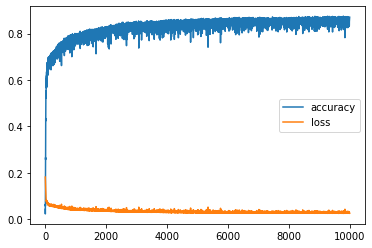

In [30]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[19 17 19 ... 19  1 19] [ 8 12 25 ...  2 15  1]
loss:  0.18949809790671654
accuracy: 0.0268125
----------------------
Epochs:  10
[ 8 12 25 ...  1 18 15] [ 8 12 25 ...  2 15  1]
loss:  0.13098998465841755
accuracy: 0.262625
----------------------
Epochs:  20
[ 8 12 25 ...  6 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.09457807208344321
accuracy: 0.5241875
----------------------
Epochs:  30
[ 8 12 25 ...  6 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.07732622761106159
accuracy: 0.63
----------------------
Epochs:  40
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06896739446119139
accuracy: 0.6680625
----------------------
Epochs:  50
[ 8 12 25 ...  6 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.06393353514275175
accuracy: 0.684875
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.060269143351810384
accuracy: 0.70075
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  9] [ 8 12

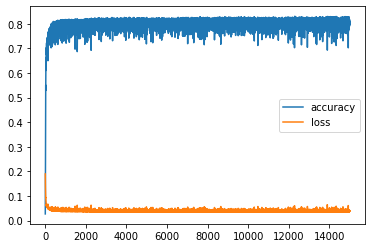

In [31]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[25  0 25 ...  0  0  0] [ 8 12 25 ...  2 15  1]
loss:  0.18137898684311204
accuracy: 0.0336875
----------------------
Epochs:  10
[11 12 23 ... 17 15 16] [ 8 12 25 ...  2 15  1]
loss:  0.12021896741101157
accuracy: 0.3913125
----------------------
Epochs:  20
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08755349748846138
accuracy: 0.5770625
----------------------
Epochs:  30
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07057574661313291
accuracy: 0.6546875
----------------------
Epochs:  40
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06255324287319237
accuracy: 0.693
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.060154499367575824
accuracy: 0.6793125
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05467407724015122
accuracy: 0.7323125
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [

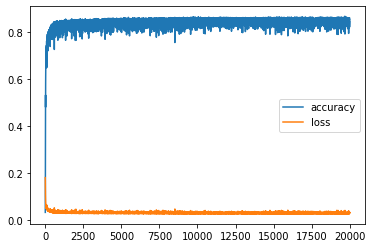

In [32]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.05, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

Training :
--------------------------------------------

Epochs:  0
[ 2  0  2 ...  0 11  0] [ 8 12 25 ...  2 15  1]
loss:  0.17673965616056983
accuracy: 0.028875
----------------------
Epochs:  10
[25 12 25 ... 18 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.11607109673425749
accuracy: 0.4246875
----------------------
Epochs:  20
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08390444591191945
accuracy: 0.6075
----------------------
Epochs:  30
[ 8 12 25 ... 23 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06725338574498675
accuracy: 0.6925625
----------------------
Epochs:  40
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.059739791049582276
accuracy: 0.7156875
----------------------
Epochs:  50
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0557890447663594
accuracy: 0.7273125
----------------------
Epochs:  60
[ 8 12 25 ...  4 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0524022583760541
accuracy: 0.7425
----------------------
Epochs:  70
[ 8 12 25 ...  4 15  1] [ 8 12

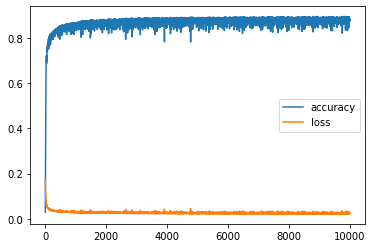

In [33]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.035, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[25 25 25 ... 25 25 16] [ 8 12 25 ...  2 15  1]
loss:  0.18346190912608248
accuracy: 0.040875
----------------------
Epochs:  10
[ 4 12  4 ...  3 13  1] [ 8 12 25 ...  2 15  1]
loss:  0.11961436502171002
accuracy: 0.4133125
----------------------
Epochs:  20
[ 8 12 25 ... 17 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08429670131668428
accuracy: 0.60025
----------------------
Epochs:  30
[ 4 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06807246155213045
accuracy: 0.6744375
----------------------
Epochs:  40
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.060770242707570726
accuracy: 0.699625
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.054848603042571935
accuracy: 0.729125
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05126247181422427
accuracy: 0.7481875
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [

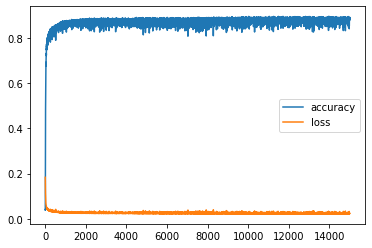

In [34]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.035, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[19 10  2 ... 19  2 11] [ 8 12 25 ...  2 15  1]
loss:  0.17742444354056663
accuracy: 0.034125
----------------------
Epochs:  10
[25 12 25 ...  6 15 18] [ 8 12 25 ...  2 15  1]
loss:  0.11799585406734221
accuracy: 0.3915
----------------------
Epochs:  20
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08249779798567944
accuracy: 0.6083125
----------------------
Epochs:  30
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0673294283405829
accuracy: 0.6845
----------------------
Epochs:  40
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06125474700793124
accuracy: 0.7055625
----------------------
Epochs:  50
[25 12  4 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05754263247513803
accuracy: 0.724125
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05408896686606266
accuracy: 0.7289375
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 12 

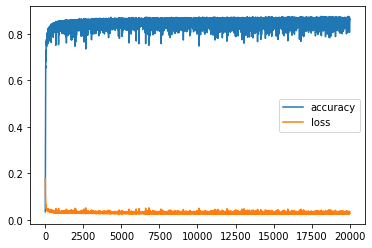

In [35]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.035, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

Training :
--------------------------------------------

Epochs:  0
[17 18 18 ... 18 18 17] [ 8 12 25 ...  2 15  1]
loss:  0.19043833040330632
accuracy: 0.02575
----------------------
Epochs:  10
[25 12 25 ... 12 25  1] [ 8 12 25 ...  2 15  1]
loss:  0.1438733327104199
accuracy: 0.224875
----------------------
Epochs:  20
[ 8 12  4 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.11145058614176856
accuracy: 0.473875
----------------------
Epochs:  30
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08945941458855004
accuracy: 0.600375
----------------------
Epochs:  40
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07515492410703996
accuracy: 0.6645625
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06618942015616369
accuracy: 0.6904375
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05960744190490113
accuracy: 0.7165625
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 

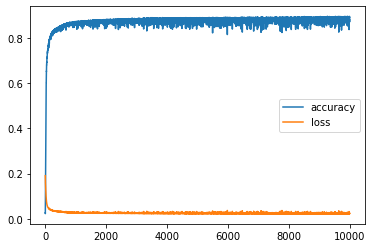

In [36]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.02, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[12 16  0 ...  0 12 12] [ 8 12 25 ...  2 15  1]
loss:  0.18276590848796073
accuracy: 0.038625
----------------------
Epochs:  10
[ 8  3 25 ... 18 15  6] [ 8 12 25 ...  2 15  1]
loss:  0.13209104030296706
accuracy: 0.2910625
----------------------
Epochs:  20
[ 8 12 25 ... 18 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09832364757575482
accuracy: 0.5509375
----------------------
Epochs:  30
[ 8 12 25 ... 18 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07897234973328639
accuracy: 0.653125
----------------------
Epochs:  40
[ 8 12 25 ... 23 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06709788612984793
accuracy: 0.7119375
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05942106754347902
accuracy: 0.74
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05503196495405337
accuracy: 0.750375
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 12

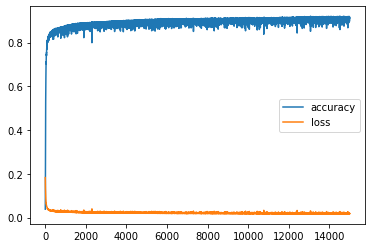

In [37]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.02, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[25 25 25 ... 21 25 21] [ 8 12 25 ...  2 15  1]
loss:  0.19291989822931993
accuracy: 0.068375
----------------------
Epochs:  10
[ 8 13 23 ... 17  1 17] [ 8 12 25 ...  2 15  1]
loss:  0.14032034409200672
accuracy: 0.2345
----------------------
Epochs:  20
[ 8 12 25 ...  0 15  3] [ 8 12 25 ...  2 15  1]
loss:  0.10710284767724215
accuracy: 0.4820625
----------------------
Epochs:  30
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08666759799829028
accuracy: 0.593875
----------------------
Epochs:  40
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07375769808402106
accuracy: 0.6548125
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06604862431888146
accuracy: 0.6929375
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.05984990140234263
accuracy: 0.72175
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 1

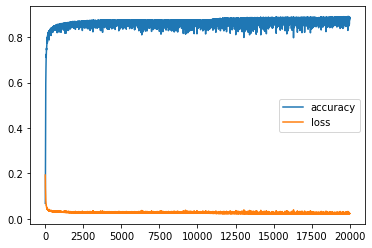

In [38]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.02, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))

Training :
--------------------------------------------

Epochs:  0
[15 22 22 ... 22  6 15] [ 8 12 25 ...  2 15  1]
loss:  0.18214424204658683
accuracy: 0.0390625
----------------------
Epochs:  10
[ 8 13  8 ... 16 14 16] [ 8 12 25 ...  2 15  1]
loss:  0.14670033582812206
accuracy: 0.1794375
----------------------
Epochs:  20
[ 8 12  8 ...  0 17  1] [ 8 12 25 ...  2 15  1]
loss:  0.12161134761884412
accuracy: 0.40525
----------------------
Epochs:  30
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10075148603536323
accuracy: 0.5533125
----------------------
Epochs:  40
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0853289833943595
accuracy: 0.6479375
----------------------
Epochs:  50
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.07441324335633973
accuracy: 0.69125
----------------------
Epochs:  60
[ 8 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.06667431982005709
accuracy: 0.7094375
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8

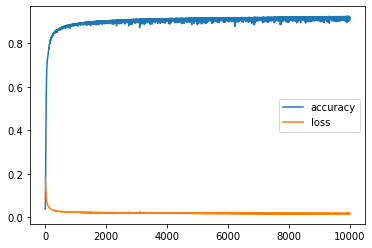

In [39]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.01, 0.8, 0.9, 10001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(10001))

Training :
--------------------------------------------

Epochs:  0
[13 20 13 ... 20 17  3] [ 8 12 25 ...  2 15  1]
loss:  0.18117387621975764
accuracy: 0.0309375
----------------------
Epochs:  10
[19 22  2 ...  2 14  7] [ 8 12 25 ...  2 15  1]
loss:  0.1522176739105704
accuracy: 0.1356875
----------------------
Epochs:  20
[25 12  4 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.13198760309004562
accuracy: 0.314
----------------------
Epochs:  30
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.11369748963379782
accuracy: 0.461375
----------------------
Epochs:  40
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09774908183466105
accuracy: 0.555875
----------------------
Epochs:  50
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08520710644458995
accuracy: 0.629125
----------------------
Epochs:  60
[25 12 25 ...  6 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.0755056793524183
accuracy: 0.66925
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8 12 25

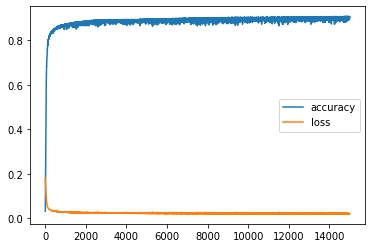

In [40]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.01, 0.8, 0.9, 15001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(15001))

Training :
--------------------------------------------

Epochs:  0
[23  7  7 ...  7  7  7] [ 8 12 25 ...  2 15  1]
loss:  0.19230183714965166
accuracy: 0.0390625
----------------------
Epochs:  10
[22  3  4 ... 13 14 17] [ 8 12 25 ...  2 15  1]
loss:  0.156016375888419
accuracy: 0.0714375
----------------------
Epochs:  20
[ 8 14 25 ... 16 14  3] [ 8 12 25 ...  2 15  1]
loss:  0.13869296420615812
accuracy: 0.2771875
----------------------
Epochs:  30
[ 8 13 25 ... 16 15 17] [ 8 12 25 ...  2 15  1]
loss:  0.1201143326358747
accuracy: 0.41775
----------------------
Epochs:  40
[ 8 13 25 ...  1 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.10483403607041719
accuracy: 0.5061875
----------------------
Epochs:  50
[ 8 13 25 ...  1 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.09251772690500766
accuracy: 0.5646875
----------------------
Epochs:  60
[ 8 12 25 ... 16 15  1] [ 8 12 25 ...  2 15  1]
loss:  0.08310684909297425
accuracy: 0.6129375
----------------------
Epochs:  70
[ 8 12 25 ...  6 15  1] [ 8

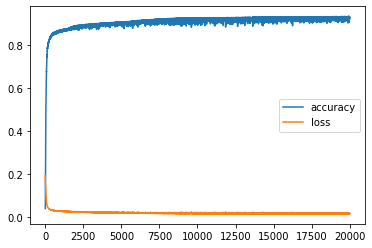

In [41]:
momentum1 = 0
momentum2 = 0
momentum3 = 0
momentum4 = 0
momentum5 = 0
momentum6 = 0
momentum7 = 0
momentum8 = 0

print('Training :')
print('--------------------------------------------\n')
W1, b1, W2, b2, acr, lss = results(X1, y1, 0.01, 0.8, 0.9, 20001)
print('\n')
print('Test :')
make_predictions(X2, y2, W1, b1, W2, b2)
print('\n')
print('Plot :')
graph(acr, lss, np.arange(20001))